In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [2]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression() 

#Your code:
model.fit(X, y)

#Hint: .fit()

LinearRegression()

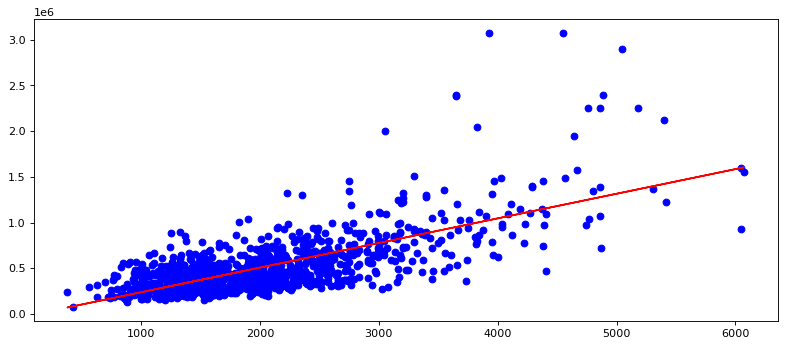

In [3]:
#b)

#Your code:
y_pred = model.predict(X)
plt.figure(figsize=(12,5), dpi=80)
plt.scatter(X, y, color = 'blue')
plt.plot(X, y_pred, color = 'red')
plt.show()
#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

On the chart we can observe a regression line, thanks to which we can determine future house prices based on their area. However, as we see, many house prices are far from the price range, which may suggest that there are other factors that have a large impact on the price of an apartment.

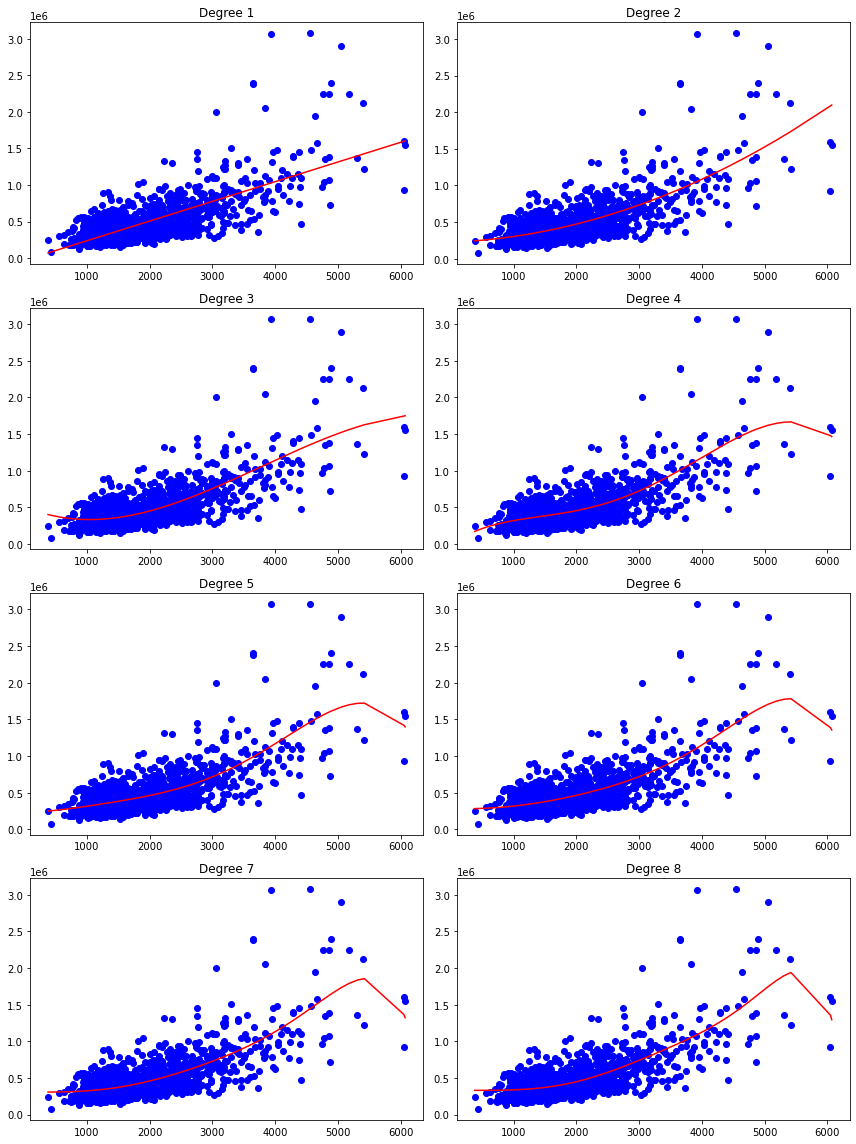

In [4]:
#c)
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
mean_squared_error_list = []
for order, ax in zip(range(1, 9), axes.ravel()):
    poly = PolynomialFeatures(degree=order)
    X_order = poly.fit_transform(X)
    
    temp = LinearRegression()
    temp.fit(X_order, y)
    
    sorted_X, sorted_y_pred = zip(*sorted(zip(X, temp.predict(X_order))))
    
    ax.scatter(X, y, color='blue')
    ax.plot(sorted_X, sorted_y_pred, color='red')
    ax.set_title(f'Degree {order}')
    
    y_pred = temp.predict(X_order)
    mse = mean_squared_error(y, y_pred)
    mean_squared_error_list.append(mse)
    
plt.tight_layout()
plt.show()

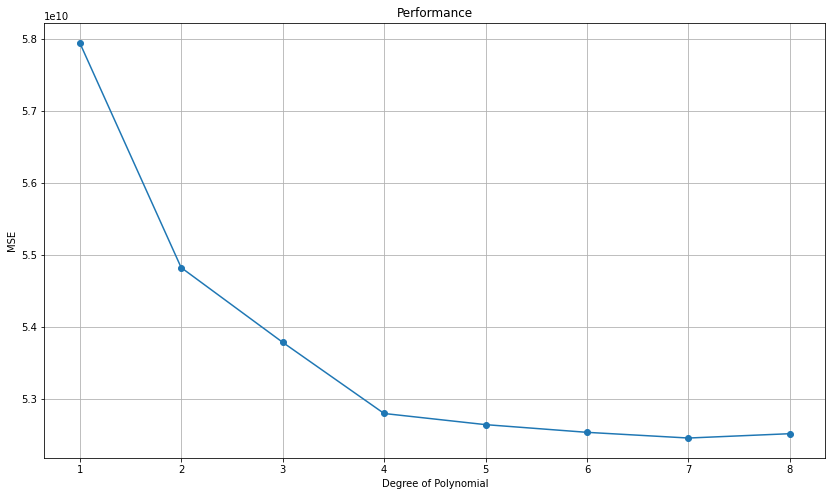

In [5]:
#Your code:

plt.figure(figsize=(14, 8))
plt.plot([x for x in range(1, 9)], mean_squared_error_list, linestyle='-', marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('MSE')
plt.title('Performance')
plt.grid(True)
plt.show()

In the graphs above we see polynomial curves with different degrees. As you can easily see, the higher the level of the polynomial, the better the fit, which can be seen in the last graph where the efficiency of these polynomials is compared. We can notice that the curve on the charts breaks down at some point, which may mean that we can buy a larger house cheaper. Higher degree curves reflect the data better, as in this example, in the first graph we can see that we could overpay a lot if we bought a large apartment.

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

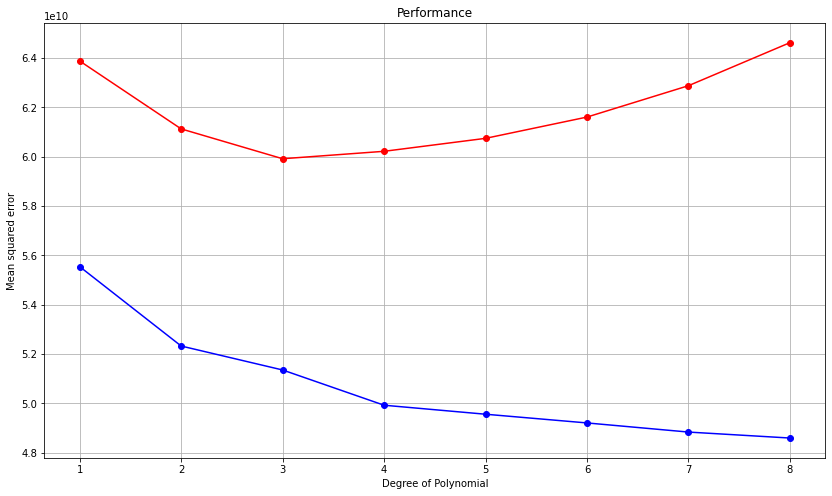

In [6]:
#a)
mean_squared_error_list_test = []
mean_squared_error_list_train = []
for order in range(1,9):
    poly = PolynomialFeatures(degree=order)
    X_order = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)
    
    temp = LinearRegression()
    temp.fit(X_train, y_train)
    
    y_pred = temp.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    mean_squared_error_list_train.append(mse)
    
    y_pred1 = temp.predict(X_test)
    mse1 = mean_squared_error(y_test, y_pred1)
    mean_squared_error_list_test.append(mse1)

plt.figure(figsize=(14, 8))
plt.plot([x for x in range(1, 9)], mean_squared_error_list_train, linestyle='-', marker='o', color = 'blue')
plt.plot([x for x in range(1, 9)], mean_squared_error_list_test, linestyle='-', marker='o', color = 'red')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean squared error')
plt.title('Performance')
plt.grid(True)
plt.show()

As you can see in this chart, the higher the degree of the polynomial, the more and more the test data differs from the training data. This may be due to overfitting as higher polynomials adapt better to the data and therefore to noise and irregularities. The second possibility is that we may have little data for large houses and, as you can see from the graphs, the polynomial curve suddenly breaks down.

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

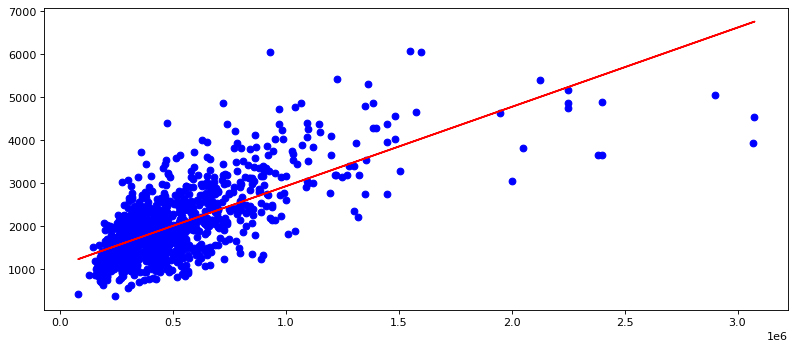

In [7]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:
model1 = LinearRegression()
model1.fit(X, y)
y_pred = model1.predict(X)
plt.figure(figsize=(12,5), dpi=80)
plt.scatter(X, y, color = 'blue')
plt.plot(X, y_pred, color = 'red')
plt.show()

In this chart we see the opposite situation than in the first task.

In [8]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 48749229407.74254


In [10]:

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view', 'price', 'floors']].values.reshape(-1,6)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 147245731.52280343


As you can see, after adding two features, we obtain a much better fit to the model because the mean square error is over 330 times smaller. As we know, a larger number of features can better take into account correlations between data. However, too many or unimportant features may distort the results.